# How to become ohsome part 8 - complex analysis with the magical filter parameter

## "CITY CYCLING" is going on - looking for cycleways in OSM for the city of Heidelberg 
It’s CITY CYCLING time – some of you may even be involved in your municipality - a good opportunity to have a look on the OpenStreetMap (OSM) cycling ways in our city Heidelberg.

Welcome to part 8 of our how to become ohsome blog post series. This time we will show you how to set up a more complex filter with several OR and AND combinations for the ohsome API to get the length of the mapped cycling ways in OSM. Like in part 4 of our series, we will again show you in a Jupyter Notebook how you can use Python to make this nice complex ohsome query and visualization in one go.


## 1 Import Python Packages

In [1]:
#The analyses and visualization of results are conducted using Python and relevant libraries

#Import "request" HTTP library to enable easier HTTP handling, see http://docs.python-requests.org/en/master/
import requests

#Import "json" package for encoding and decoding JSON data, see https://docs.python.org/3/library/json.html
import json

#Import "datetime" and "time" module to enable time-related functionalities, see https://docs.python.org/2/library/time.html
import datetime
import time

#Import "panda" library for data manipulation and analysis, see https://pandas.pydata.org/
import pandas as pd
pd.set_option('max_colwidth',100)
import matplotlib.pyplot as plt

# ipyleaflet: Interactive maps in the Jupyter notebook
from ipyleaflet import Map, GeoJSON

## 2 Declaring helper function for POST request url:

In [2]:
def elements(agg,**params):
    res = requests.post("https://api.ohsome.org/v1/elements"+agg,params)
    return res

## 3 Define parameters of the POST request

### Heidelberg geojson

In [3]:
# Heidelberg boundary as geojson
bpolys = '{"type": "FeatureCollection","name": "HD_boundary","crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },"features": [{ "type": "Feature", "properties": { "full_id": null, "osm_id": null, "osm_type": null, "name": "Heidelberg", "CO2": 1.69, "iD_Gem": "14G", "auxiliary_": null, "auxiliar_1": null, "GemKlimapr": "Heidelberg", "GemKlima_1": 160.355, "GemKlima_2": "286.000", "GemKlima_3": "Ordentliche Aufwendungen in � 2020", "GemKlima_4": "Verkehr 2017", "GemKlima_5": "1.78", "auxiliar_2": 8.697427876112549, "auxiliar_3": 49.425153013379607 }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ 8.7289417, 49.3668968 ], [ 8.7286706, 49.3667047 ], [ 8.7284459, 49.3664412 ], [ 8.7277172, 49.3655087 ], [ 8.7274233, 49.3641325 ], [ 8.7272017, 49.362889 ], [ 8.7271129, 49.3619886 ], [ 8.7260939, 49.3603743 ], [ 8.7260553, 49.3600452 ], [ 8.7260156, 49.3594762 ], [ 8.7255992, 49.358803 ], [ 8.7254977, 49.3586631 ], [ 8.7252405, 49.3583083 ], [ 8.7249365, 49.3579211 ], [ 8.7241961, 49.3576019 ], [ 8.723668, 49.3574388 ], [ 8.7223892, 49.3572534 ], [ 8.7214611, 49.3571727 ], [ 8.7212669, 49.357192 ], [ 8.7201218, 49.3572835 ], [ 8.71971, 49.3573024 ], [ 8.7194717, 49.3570652 ], [ 8.7193418, 49.3567617 ], [ 8.7189598, 49.3563511 ], [ 8.718652, 49.3563789 ], [ 8.716396, 49.3563423 ], [ 8.7159867, 49.35624 ], [ 8.7150837, 49.3559509 ], [ 8.71423, 49.3557463 ], [ 8.7133905, 49.3556946 ], [ 8.7125125, 49.355659 ], [ 8.7119459, 49.3556184 ], [ 8.7116834, 49.355525 ], [ 8.7113998, 49.3553405 ], [ 8.7112492, 49.3552104 ], [ 8.7108887, 49.3551103 ], [ 8.7102703, 49.3555424 ], [ 8.70964, 49.3565799 ], [ 8.7083025, 49.3563411 ], [ 8.7068817, 49.3561232 ], [ 8.7063528, 49.3560421 ], [ 8.7057764, 49.3559196 ], [ 8.7054043, 49.3558708 ], [ 8.7052338, 49.3558484 ], [ 8.7046666, 49.3557862 ], [ 8.7039794, 49.3557454 ], [ 8.7033211, 49.3557223 ], [ 8.7024903, 49.3557158 ], [ 8.7018474, 49.3558153 ], [ 8.7017689, 49.3558457 ], [ 8.7012064, 49.3560633 ], [ 8.7005405, 49.3563271 ], [ 8.7000916, 49.3565505 ], [ 8.7000501, 49.3565713 ], [ 8.6994679, 49.3568675 ], [ 8.6992244, 49.3570033 ], [ 8.6991332, 49.3570051 ], [ 8.699042, 49.3570046 ], [ 8.6982345, 49.3574206 ], [ 8.6969526, 49.3580393 ], [ 8.6966864, 49.3577892 ], [ 8.6963999, 49.3577489 ], [ 8.6944443, 49.3582386 ], [ 8.6946209, 49.3585367 ], [ 8.69466, 49.3586027 ], [ 8.6943686, 49.3586788 ], [ 8.6941356, 49.3583571 ], [ 8.693654, 49.3584802 ], [ 8.693627, 49.3583714 ], [ 8.6929043, 49.3585068 ], [ 8.6928745, 49.3583863 ], [ 8.6924383, 49.3585125 ], [ 8.6923844, 49.3584146 ], [ 8.6913995, 49.3584922 ], [ 8.6914693, 49.358787 ], [ 8.6906838, 49.3588992 ], [ 8.690288, 49.3589292 ], [ 8.6892133, 49.3589418 ], [ 8.689029, 49.3588997 ], [ 8.6872368, 49.3588595 ], [ 8.6871857, 49.3591384 ], [ 8.6870666, 49.3597598 ], [ 8.6870596, 49.3598243 ], [ 8.6843777, 49.3597807 ], [ 8.6842474, 49.3598166 ], [ 8.6820136, 49.3599072 ], [ 8.6820844, 49.3603891 ], [ 8.6799212, 49.3604254 ], [ 8.6798174, 49.3604268 ], [ 8.6787495, 49.3604415 ], [ 8.6782274, 49.3604275 ], [ 8.6772484, 49.3603561 ], [ 8.6759553, 49.3602212 ], [ 8.675834, 49.3606678 ], [ 8.6741996, 49.361218 ], [ 8.6724425, 49.3615211 ], [ 8.6721886, 49.3605946 ], [ 8.6719046, 49.3591866 ], [ 8.6716797, 49.3578179 ], [ 8.6714647, 49.3578048 ], [ 8.6698072, 49.3580033 ], [ 8.6687636, 49.3581269 ], [ 8.668543, 49.3581107 ], [ 8.66801, 49.3580647 ], [ 8.6670289, 49.3579798 ], [ 8.664876, 49.3575926 ], [ 8.6645227, 49.3575483 ], [ 8.6642566, 49.357496 ], [ 8.664343, 49.3571395 ], [ 8.6645159, 49.356424 ], [ 8.6648624, 49.354592 ], [ 8.665018, 49.3537694 ], [ 8.664184, 49.3536627 ], [ 8.6635785, 49.3535852 ], [ 8.6632027, 49.3543955 ], [ 8.6624986, 49.3543138 ], [ 8.6615292, 49.3540661 ], [ 8.6611865, 49.3539883 ], [ 8.6605535, 49.3538501 ], [ 8.6606617, 49.3548306 ], [ 8.6600989, 49.3548636 ], [ 8.658874, 49.3549378 ], [ 8.6572433, 49.3551949 ], [ 8.6566888, 49.3543596 ], [ 8.6563616, 49.3540174 ], [ 8.656818, 49.3537317 ], [ 8.6574038, 49.353355 ], [ 8.6573057, 49.3533028 ], [ 8.6579381, 49.3527604 ], [ 8.6581469, 49.3525646 ], [ 8.6580042, 49.3525781 ], [ 8.657803, 49.3526095 ], [ 8.657702, 49.3526217 ], [ 8.6575935, 49.3526351 ], [ 8.656788, 49.3527773 ], [ 8.6553188, 49.3530211 ], [ 8.6545409, 49.3531457 ], [ 8.6540528, 49.3532147 ], [ 8.6537418, 49.3532448 ], [ 8.6534741, 49.3532581 ], [ 8.6531244, 49.3532768 ], [ 8.6528438, 49.3532787 ], [ 8.6526151, 49.3532725 ], [ 8.6523476, 49.3532462 ], [ 8.6520458, 49.353203 ], [ 8.65183, 49.3531912 ], [ 8.6516358, 49.3531877 ], [ 8.6514545, 49.3532041 ], [ 8.6512772, 49.3532543 ], [ 8.6521039, 49.3545798 ], [ 8.6525441, 49.3552873 ], [ 8.6529874, 49.3557702 ], [ 8.6533615, 49.3562631 ], [ 8.6545614, 49.3561124 ], [ 8.6547873, 49.35643 ], [ 8.6548785, 49.3565583 ], [ 8.6553543, 49.357298 ], [ 8.6558142, 49.3581382 ], [ 8.6564537, 49.3592904 ], [ 8.6570089, 49.3601791 ], [ 8.6580515, 49.3617759 ], [ 8.6591636, 49.3625711 ], [ 8.6586509, 49.3628365 ], [ 8.6581846, 49.3630544 ], [ 8.6577636, 49.3632772 ], [ 8.6571423, 49.3628128 ], [ 8.6563769, 49.3631151 ], [ 8.6554071, 49.3634728 ], [ 8.6547682, 49.3637372 ], [ 8.6541116, 49.3640197 ], [ 8.6535186, 49.3642731 ], [ 8.6529146, 49.3645492 ], [ 8.652197, 49.3649022 ], [ 8.6518467, 49.3650935 ], [ 8.6516914, 49.3649757 ], [ 8.6499424, 49.3659782 ], [ 8.6501153, 49.3662698 ], [ 8.650281, 49.3665729 ], [ 8.6505287, 49.3669839 ], [ 8.6508413, 49.3674777 ], [ 8.6504907, 49.3676851 ], [ 8.6497749, 49.368118 ], [ 8.6491475, 49.368515 ], [ 8.6486156, 49.3688557 ], [ 8.6481301, 49.3691556 ], [ 8.6477754, 49.3693949 ], [ 8.6473631, 49.3697114 ], [ 8.6463645, 49.3704642 ], [ 8.6462065, 49.3703028 ], [ 8.6459447, 49.3700859 ], [ 8.6456094, 49.3698569 ], [ 8.6452464, 49.3696208 ], [ 8.6449869, 49.3694587 ], [ 8.6447163, 49.3693239 ], [ 8.644035, 49.3690715 ], [ 8.642835, 49.3686548 ], [ 8.6409498, 49.3696196 ], [ 8.6402741, 49.3699773 ], [ 8.639672, 49.368535 ], [ 8.6391048, 49.3670998 ], [ 8.6387969, 49.3663797 ], [ 8.6383624, 49.3653226 ], [ 8.6379857, 49.3643575 ], [ 8.6376642, 49.3636099 ], [ 8.6374429, 49.3631909 ], [ 8.6373038, 49.3628043 ], [ 8.637264, 49.3626352 ], [ 8.6371357, 49.36199 ], [ 8.6368883, 49.3610373 ], [ 8.636737, 49.3605379 ], [ 8.6366566, 49.3603567 ], [ 8.6361029, 49.3596711 ], [ 8.6353961, 49.3587648 ], [ 8.6348595, 49.3580954 ], [ 8.6345035, 49.3576857 ], [ 8.6344208, 49.3574451 ], [ 8.634287, 49.3571263 ], [ 8.6341671, 49.3568077 ], [ 8.6339741, 49.3564816 ], [ 8.6337575, 49.3561005 ], [ 8.6335502, 49.3557811 ], [ 8.633367, 49.3554894 ], [ 8.6333554, 49.3550117 ], [ 8.6332889, 49.3539394 ], [ 8.6332336, 49.352838 ], [ 8.6331117, 49.3528362 ], [ 8.6329027, 49.3528456 ], [ 8.6326054, 49.3528395 ], [ 8.6322274, 49.3528158 ], [ 8.6320022, 49.3528086 ], [ 8.6319093, 49.3527963 ], [ 8.6315131, 49.3527736 ], [ 8.6307874, 49.3527339 ], [ 8.630765, 49.3520712 ], [ 8.6296401, 49.3521053 ], [ 8.6291211, 49.3521083 ], [ 8.628566, 49.3521019 ], [ 8.6279893, 49.3520906 ], [ 8.6256253, 49.3520029 ], [ 8.6252142, 49.3520392 ], [ 8.625019, 49.3521187 ], [ 8.6233232, 49.3528795 ], [ 8.6210852, 49.3538771 ], [ 8.6206855, 49.3540073 ], [ 8.620484, 49.3540376 ], [ 8.6202148, 49.3540732 ], [ 8.6213542, 49.3554986 ], [ 8.6230192, 49.3575814 ], [ 8.6232816, 49.3574603 ], [ 8.6244659, 49.3590632 ], [ 8.623627, 49.3591909 ], [ 8.6224364, 49.3594703 ], [ 8.6220895, 49.35959 ], [ 8.6218229, 49.3597127 ], [ 8.6213639, 49.3599157 ], [ 8.6210862, 49.3600439 ], [ 8.6206253, 49.3602057 ], [ 8.6199754, 49.3604606 ], [ 8.6194433, 49.3606533 ], [ 8.6189566, 49.3608491 ], [ 8.6182366, 49.361201 ], [ 8.6175911, 49.3615292 ], [ 8.6170434, 49.3617673 ], [ 8.6163502, 49.3620581 ], [ 8.6154444, 49.362414 ], [ 8.6136374, 49.3631029 ], [ 8.6121292, 49.3636618 ], [ 8.6115552, 49.3638492 ], [ 8.6109946, 49.3640529 ], [ 8.610605, 49.3641792 ], [ 8.6103539, 49.3642507 ], [ 8.610128, 49.3642995 ], [ 8.6097967, 49.3643606 ], [ 8.609518, 49.3644178 ], [ 8.6092398, 49.3644613 ], [ 8.608975, 49.3645257 ], [ 8.6087626, 49.3645885 ], [ 8.6085214, 49.3646761 ], [ 8.6082305, 49.3647789 ], [ 8.6080035, 49.3648575 ], [ 8.6077873, 49.3649318 ], [ 8.6075621, 49.3649624 ], [ 8.6071546, 49.3650039 ], [ 8.6058855, 49.3651588 ], [ 8.6054789, 49.3652142 ], [ 8.6043073, 49.3654187 ], [ 8.6043931, 49.3655768 ], [ 8.6010036, 49.366203 ], [ 8.6032102, 49.3683766 ], [ 8.6051676, 49.3702715 ], [ 8.6057977, 49.3700969 ], [ 8.6065358, 49.3718858 ], [ 8.6073325, 49.3738506 ], [ 8.6074839, 49.3742901 ], [ 8.6072224, 49.3749861 ], [ 8.6068103, 49.3761634 ], [ 8.6068825, 49.3767513 ], [ 8.6073418, 49.3769719 ], [ 8.6079162, 49.3772099 ], [ 8.608678, 49.3775051 ], [ 8.609066, 49.3776494 ], [ 8.6094026, 49.3777565 ], [ 8.609757, 49.37785 ], [ 8.6101858, 49.3779193 ], [ 8.6108659, 49.378017 ], [ 8.6125814, 49.3782023 ], [ 8.6137509, 49.3785283 ], [ 8.6145451, 49.3787578 ], [ 8.615294, 49.3789184 ], [ 8.6161546, 49.379158 ], [ 8.6179316, 49.3792829 ], [ 8.6211118, 49.3800106 ], [ 8.6243819, 49.3806698 ], [ 8.6237852, 49.3816676 ], [ 8.6242405, 49.3819904 ], [ 8.624878, 49.3823871 ], [ 8.6253831, 49.382699 ], [ 8.6259858, 49.3830683 ], [ 8.6264596, 49.3833504 ], [ 8.6271218, 49.383729 ], [ 8.6278012, 49.3841304 ], [ 8.6283659, 49.3844447 ], [ 8.6288505, 49.3847063 ], [ 8.6294359, 49.3849446 ], [ 8.6298581, 49.3851072 ], [ 8.6301986, 49.3852005 ], [ 8.6334012, 49.3858992 ], [ 8.633434, 49.3862271 ], [ 8.6335418, 49.3868974 ], [ 8.6335984, 49.3871737 ], [ 8.633683, 49.3871847 ], [ 8.6349263, 49.387313 ], [ 8.6366041, 49.3870397 ], [ 8.6380863, 49.3865727 ], [ 8.638662, 49.3864107 ], [ 8.6393871, 49.3864134 ], [ 8.6396667, 49.3864344 ], [ 8.6399161, 49.3864979 ], [ 8.6410377, 49.3868407 ], [ 8.6420906, 49.3871491 ], [ 8.6438066, 49.3876092 ], [ 8.6453569, 49.3880444 ], [ 8.6475003, 49.3885366 ], [ 8.6463596, 49.3898661 ], [ 8.6455349, 49.3908845 ], [ 8.6435267, 49.3931598 ], [ 8.6435117, 49.3931943 ], [ 8.64343, 49.3933814 ], [ 8.6407216, 49.393021 ], [ 8.638521, 49.3927462 ], [ 8.6382951, 49.3927199 ], [ 8.6381855, 49.3938128 ], [ 8.6380085, 49.3956477 ], [ 8.6375495, 49.3988001 ], [ 8.6372219, 49.401141 ], [ 8.6370171, 49.402596 ], [ 8.6369263, 49.4032678 ], [ 8.6369, 49.4034619 ], [ 8.6368271, 49.403969 ], [ 8.6367433, 49.4045516 ], [ 8.636706, 49.4048058 ], [ 8.6366669, 49.4050725 ], [ 8.6365905, 49.4055659 ], [ 8.6364653, 49.406041 ], [ 8.6363792, 49.4063905 ], [ 8.6362151, 49.4069569 ], [ 8.6361363, 49.4072424 ], [ 8.6360332, 49.40753 ], [ 8.6358732, 49.4079319 ], [ 8.6354074, 49.4090923 ], [ 8.634737, 49.4107628 ], [ 8.6344464, 49.4114867 ], [ 8.6340603, 49.4124487 ], [ 8.6330749, 49.4148068 ], [ 8.633025, 49.4149279 ], [ 8.6329381, 49.4149614 ], [ 8.6327478, 49.4150347 ], [ 8.6327069, 49.4150072 ], [ 8.6320781, 49.4145831 ], [ 8.6309585, 49.4138334 ], [ 8.6300343, 49.4131756 ], [ 8.6290718, 49.4124857 ], [ 8.6285903, 49.4122128 ], [ 8.6282627, 49.4120323 ], [ 8.6269795, 49.4113406 ], [ 8.6244983, 49.4099575 ], [ 8.6228506, 49.4090493 ], [ 8.6227217, 49.4089757 ], [ 8.6227202, 49.4089752 ], [ 8.6226484, 49.4089526 ], [ 8.6226269, 49.4090096 ], [ 8.622553, 49.409046 ], [ 8.6166063, 49.4073833 ], [ 8.6124373, 49.4062033 ], [ 8.6114614, 49.4054669 ], [ 8.6106734, 49.4059495 ], [ 8.6087942, 49.407045 ], [ 8.6052003, 49.4084559 ], [ 8.6036384, 49.4090794 ], [ 8.6035403, 49.4091045 ], [ 8.6033931, 49.4091271 ], [ 8.6005224, 49.4095265 ], [ 8.5986402, 49.4097837 ], [ 8.598479, 49.4097994 ], [ 8.5978167, 49.409869 ], [ 8.5971087, 49.4099478 ], [ 8.5964569, 49.4100128 ], [ 8.5957176, 49.41008 ], [ 8.5950272, 49.4101314 ], [ 8.594295, 49.410194 ], [ 8.5929915, 49.4102853 ], [ 8.5925566, 49.4103162 ], [ 8.5924904, 49.4103255 ], [ 8.592504, 49.4103918 ], [ 8.5906643, 49.4105506 ], [ 8.5848926, 49.4110409 ], [ 8.5848405, 49.4110425 ], [ 8.5847292, 49.410896 ], [ 8.5846596, 49.4108089 ], [ 8.5846005, 49.4107403 ], [ 8.5844613, 49.4105983 ], [ 8.5842557, 49.4104104 ], [ 8.5836207, 49.4106036 ], [ 8.5828103, 49.4108305 ], [ 8.5821261, 49.4110212 ], [ 8.5814666, 49.4111982 ], [ 8.5810212, 49.4113139 ], [ 8.5805477, 49.4114249 ], [ 8.5803267, 49.4114771 ], [ 8.5788706, 49.4118155 ], [ 8.5774184, 49.4121622 ], [ 8.5768059, 49.4123091 ], [ 8.5763545, 49.4124034 ], [ 8.575952, 49.4124793 ], [ 8.5751259, 49.4126196 ], [ 8.5749055, 49.4126587 ], [ 8.5740981, 49.4144215 ], [ 8.5739799, 49.4147233 ], [ 8.5736221, 49.415734 ], [ 8.5734303, 49.4157628 ], [ 8.5732881, 49.416518 ], [ 8.5732227, 49.4169019 ], [ 8.5732061, 49.4172173 ], [ 8.5732105, 49.4175624 ], [ 8.5732329, 49.4180263 ], [ 8.5732441, 49.4182388 ], [ 8.5732621, 49.4184604 ], [ 8.5732802, 49.4186341 ], [ 8.5732535, 49.4191025 ], [ 8.5734868, 49.4198518 ], [ 8.5735754, 49.4202082 ], [ 8.5736183, 49.4204779 ], [ 8.5736296, 49.4207657 ], [ 8.5736023, 49.4210286 ], [ 8.5735169, 49.4217463 ], [ 8.5732444, 49.4232662 ], [ 8.5731788, 49.4236 ], [ 8.5742426, 49.4240214 ], [ 8.5752902, 49.4244224 ], [ 8.5753853, 49.4243564 ], [ 8.5772884, 49.4250846 ], [ 8.5777913, 49.4252735 ], [ 8.5798332, 49.4261986 ], [ 8.5813792, 49.4264503 ], [ 8.5820231, 49.4264727 ], [ 8.5829195, 49.4265061 ], [ 8.5835079, 49.4265415 ], [ 8.5840787, 49.4265995 ], [ 8.5862321, 49.4268456 ], [ 8.5870795, 49.426934 ], [ 8.5872399, 49.4269575 ], [ 8.5877643, 49.4270379 ], [ 8.5884423, 49.4271511 ], [ 8.5894351, 49.4272957 ], [ 8.5897569, 49.4273294 ], [ 8.5900544, 49.4273469 ], [ 8.5904499, 49.4273673 ], [ 8.5907782, 49.4277347 ], [ 8.5929629, 49.4301327 ], [ 8.5932586, 49.4300246 ], [ 8.5982296, 49.4281431 ], [ 8.5984897, 49.4280444 ], [ 8.5983823, 49.4285076 ], [ 8.5998845, 49.4279717 ], [ 8.6054724, 49.4258258 ], [ 8.6097328, 49.4242417 ], [ 8.6099518, 49.4243821 ], [ 8.6153097, 49.4278839 ], [ 8.6159738, 49.4283027 ], [ 8.6162598, 49.4286207 ], [ 8.6194931, 49.4322643 ], [ 8.6209266, 49.4338928 ], [ 8.6210495, 49.4338426 ], [ 8.6211645, 49.4339639 ], [ 8.6213948, 49.4342246 ], [ 8.6222041, 49.435144 ], [ 8.6223086, 49.435279 ], [ 8.6224063, 49.4354117 ], [ 8.6225212, 49.4355946 ], [ 8.6226187, 49.43575 ], [ 8.6227197, 49.4359146 ], [ 8.6228311, 49.4361021 ], [ 8.6229251, 49.4362255 ], [ 8.6230368, 49.4363559 ], [ 8.62331, 49.4366312 ], [ 8.6261343, 49.4393941 ], [ 8.6267426, 49.439998 ], [ 8.6266156, 49.4400589 ], [ 8.626819, 49.4402646 ], [ 8.6273509, 49.4408265 ], [ 8.6280122, 49.4415699 ], [ 8.6282109, 49.4419759 ], [ 8.6287032, 49.4431153 ], [ 8.6293672, 49.4430182 ], [ 8.6304526, 49.4428791 ], [ 8.6316014, 49.44272 ], [ 8.6327018, 49.442524 ], [ 8.633858, 49.4423421 ], [ 8.6349834, 49.4421257 ], [ 8.6360775, 49.4418929 ], [ 8.6371722, 49.4416306 ], [ 8.6382116, 49.4413358 ], [ 8.6393046, 49.4409797 ], [ 8.6403103, 49.4406069 ], [ 8.6412921, 49.4402042 ], [ 8.6422463, 49.4397852 ], [ 8.6425645, 49.4396349 ], [ 8.6426096, 49.4396097 ], [ 8.6431489, 49.4393088 ], [ 8.6437411, 49.4389438 ], [ 8.6441677, 49.4386232 ], [ 8.6447542, 49.4381873 ], [ 8.6451587, 49.4378514 ], [ 8.6454878, 49.4376043 ], [ 8.6457855, 49.4373455 ], [ 8.6460161, 49.4371321 ], [ 8.6461933, 49.4369732 ], [ 8.6465518, 49.4366257 ], [ 8.6472182, 49.4368785 ], [ 8.6482037, 49.4372521 ], [ 8.6489684, 49.4376934 ], [ 8.6488619, 49.4377847 ], [ 8.6490535, 49.4378656 ], [ 8.6533943, 49.4393175 ], [ 8.65531, 49.4399429 ], [ 8.6563081, 49.4386057 ], [ 8.6570032, 49.4387578 ], [ 8.6582674, 49.4390387 ], [ 8.6583852, 49.4388725 ], [ 8.6604604, 49.4392855 ], [ 8.6617349, 49.4395384 ], [ 8.6623738, 49.4396637 ], [ 8.6624387, 49.4396889 ], [ 8.6626366, 49.4396856 ], [ 8.6630463, 49.4396298 ], [ 8.6632377, 49.4398573 ], [ 8.6632449, 49.4399475 ], [ 8.6634936, 49.4399409 ], [ 8.6652142, 49.4402266 ], [ 8.6653439, 49.4402666 ], [ 8.6654034, 49.4402759 ], [ 8.6654509, 49.4402998 ], [ 8.6655157, 49.440349 ], [ 8.6656772, 49.4405364 ], [ 8.6658483, 49.4406398 ], [ 8.6662638, 49.4407719 ], [ 8.6671039, 49.4408355 ], [ 8.6689318, 49.4412616 ], [ 8.6699149, 49.4414667 ], [ 8.67033, 49.4414938 ], [ 8.6707607, 49.4413431 ], [ 8.6715746, 49.4408339 ], [ 8.6723411, 49.4411247 ], [ 8.6727405, 49.4413263 ], [ 8.6728605, 49.4412528 ], [ 8.673293, 49.441504 ], [ 8.6747767, 49.4419681 ], [ 8.6751848, 49.4420353 ], [ 8.6760967, 49.4421986 ], [ 8.676933, 49.4423486 ], [ 8.6770124, 49.4423913 ], [ 8.6772067, 49.4424941 ], [ 8.6783343, 49.4426242 ], [ 8.6783587, 49.4425922 ], [ 8.6791921, 49.4426978 ], [ 8.6791132, 49.4430197 ], [ 8.6796701, 49.4431327 ], [ 8.6803929, 49.4434827 ], [ 8.6807956, 49.4435343 ], [ 8.6812442, 49.4436749 ], [ 8.6816574, 49.4436923 ], [ 8.6821162, 49.4437735 ], [ 8.6823347, 49.4438621 ], [ 8.6826771, 49.4439709 ], [ 8.6829643, 49.444 ], [ 8.6834957, 49.443878 ], [ 8.6838872, 49.4437677 ], [ 8.6842998, 49.443671 ], [ 8.6846072, 49.4435404 ], [ 8.6849599, 49.4433548 ], [ 8.6854463, 49.4433287 ], [ 8.6855722, 49.4433193 ], [ 8.6860652, 49.4432134 ], [ 8.6867994, 49.4430476 ], [ 8.6873627, 49.4430076 ], [ 8.6875693, 49.4430345 ], [ 8.6878572, 49.4432119 ], [ 8.6893699, 49.4432628 ], [ 8.6904963, 49.4432362 ], [ 8.6912439, 49.4436499 ], [ 8.6917068, 49.4438452 ], [ 8.6921663, 49.4440176 ], [ 8.6927337, 49.4441168 ], [ 8.6936862, 49.444206 ], [ 8.6955151, 49.4445855 ], [ 8.6959665, 49.4445549 ], [ 8.6964361, 49.4446657 ], [ 8.6968641, 49.4448656 ], [ 8.6980095, 49.4450252 ], [ 8.7004409, 49.4454739 ], [ 8.7022348, 49.4458192 ], [ 8.7032259, 49.4459197 ], [ 8.7039893, 49.4460002 ], [ 8.7044865, 49.4460219 ], [ 8.7053786, 49.4459241 ], [ 8.7060433, 49.4458724 ], [ 8.7067328, 49.4458572 ], [ 8.7075269, 49.4458904 ], [ 8.7080621, 49.4459479 ], [ 8.7089578, 49.4461563 ], [ 8.7093251, 49.4461977 ], [ 8.709412, 49.4466473 ], [ 8.7094671, 49.4475009 ], [ 8.7095194, 49.4477246 ], [ 8.7106973, 49.4490126 ], [ 8.7113827, 49.4494833 ], [ 8.7117118, 49.4498477 ], [ 8.7119228, 49.4500624 ], [ 8.7120632, 49.4501811 ], [ 8.7122212, 49.4502632 ], [ 8.7126181, 49.4506354 ], [ 8.7129073, 49.4511884 ], [ 8.7129813, 49.4513369 ], [ 8.7130797, 49.4514145 ], [ 8.7134479, 49.4515467 ], [ 8.7137288, 49.4517635 ], [ 8.7140272, 49.4519643 ], [ 8.7143957, 49.4521719 ], [ 8.7148131, 49.4523383 ], [ 8.7151742, 49.4524202 ], [ 8.7156469, 49.452383 ], [ 8.7163681, 49.4522906 ], [ 8.7169947, 49.4521869 ], [ 8.7174148, 49.4521177 ], [ 8.7178277, 49.4520395 ], [ 8.7183245, 49.4518286 ], [ 8.7189887, 49.4514824 ], [ 8.7196142, 49.4510655 ], [ 8.7200859, 49.4507448 ], [ 8.7204914, 49.4505453 ], [ 8.7210228, 49.4502382 ], [ 8.7214415, 49.4498147 ], [ 8.7216961, 49.4495034 ], [ 8.7218531, 49.4493455 ], [ 8.7220774, 49.4491851 ], [ 8.7224591, 49.4490165 ], [ 8.7228967, 49.4488206 ], [ 8.7236352, 49.4485791 ], [ 8.7241952, 49.4484517 ], [ 8.7254378, 49.448206 ], [ 8.7264385, 49.4482134 ], [ 8.730015, 49.4483732 ], [ 8.7327479, 49.4485688 ], [ 8.7346234, 49.44883 ], [ 8.7351517, 49.4489558 ], [ 8.735799, 49.4491273 ], [ 8.7365409, 49.4492418 ], [ 8.7368523, 49.4492374 ], [ 8.7370834, 49.4491714 ], [ 8.7373179, 49.4490596 ], [ 8.7380076, 49.4484233 ], [ 8.7384312, 49.4480173 ], [ 8.7392123, 49.4469405 ], [ 8.7392056, 49.4463859 ], [ 8.7457, 49.4468912 ], [ 8.7457418, 49.4474185 ], [ 8.7458535, 49.448142 ], [ 8.7458079, 49.4483792 ], [ 8.7457483, 49.4486737 ], [ 8.7456812, 49.4488244 ], [ 8.7454371, 49.4490854 ], [ 8.7450255, 49.449477 ], [ 8.744778, 49.4497609 ], [ 8.7447195, 49.4500331 ], [ 8.744724, 49.4502777 ], [ 8.7445565, 49.4504289 ], [ 8.7447186, 49.4506847 ], [ 8.7448706, 49.4510228 ], [ 8.7455857, 49.4519911 ], [ 8.7459665, 49.4526262 ], [ 8.7462352, 49.453234 ], [ 8.7462013, 49.4534992 ], [ 8.746118, 49.4537006 ], [ 8.7460253, 49.4541603 ], [ 8.7459427, 49.4545216 ], [ 8.7459118, 49.4546909 ], [ 8.7459753, 49.4547708 ], [ 8.7460633, 49.4548964 ], [ 8.7460779, 49.4550541 ], [ 8.7460827, 49.4553628 ], [ 8.7460524, 49.4556418 ], [ 8.7458951, 49.4557541 ], [ 8.7453882, 49.4559743 ], [ 8.7451013, 49.4560822 ], [ 8.7449542, 49.4560893 ], [ 8.7447756, 49.456069 ], [ 8.7446285, 49.4561012 ], [ 8.7444362, 49.4561679 ], [ 8.7440513, 49.4562827 ], [ 8.7435577, 49.4563521 ], [ 8.7430497, 49.4563346 ], [ 8.7425697, 49.4563285 ], [ 8.7420481, 49.4564001 ], [ 8.7418418, 49.4564782 ], [ 8.7418071, 49.4565628 ], [ 8.741746, 49.4570407 ], [ 8.7416744, 49.4575576 ], [ 8.7419695, 49.4577698 ], [ 8.7426433, 49.4580797 ], [ 8.7431206, 49.4583053 ], [ 8.7432401, 49.4583784 ], [ 8.7432195, 49.4584973 ], [ 8.7433358, 49.4586479 ], [ 8.7443151, 49.4591587 ], [ 8.7448838, 49.4594344 ], [ 8.7452347, 49.4595711 ], [ 8.7454695, 49.4596141 ], [ 8.7463521, 49.459567 ], [ 8.7478334, 49.4594413 ], [ 8.7489922, 49.459252 ], [ 8.7500914, 49.4590719 ], [ 8.7504382, 49.4589581 ], [ 8.75158, 49.4592042 ], [ 8.7530988, 49.4595484 ], [ 8.7539864, 49.4596927 ], [ 8.7547049, 49.4596419 ], [ 8.7546862, 49.4594683 ], [ 8.7554084, 49.4588538 ], [ 8.7560621, 49.4584054 ], [ 8.756618, 49.4579338 ], [ 8.7570406, 49.4574728 ], [ 8.7575549, 49.4567018 ], [ 8.7586338, 49.4566622 ], [ 8.7605503, 49.4565725 ], [ 8.7629395, 49.4564877 ], [ 8.7632898, 49.4564667 ], [ 8.7635747, 49.4563679 ], [ 8.7653325, 49.4555467 ], [ 8.7677061, 49.4541925 ], [ 8.7671067, 49.4536985 ], [ 8.7663195, 49.4531028 ], [ 8.7652773, 49.4524693 ], [ 8.7642763, 49.4518931 ], [ 8.7631688, 49.4514327 ], [ 8.7620511, 49.4509471 ], [ 8.7618183, 49.4508065 ], [ 8.7617028, 49.4506182 ], [ 8.7617663, 49.4481355 ], [ 8.7647278, 49.4460471 ], [ 8.7663344, 49.4435839 ], [ 8.7663702, 49.4418634 ], [ 8.7662228, 49.4402745 ], [ 8.7665154, 49.4402744 ], [ 8.7663983, 49.4373654 ], [ 8.7694818, 49.4360464 ], [ 8.7704502, 49.4357373 ], [ 8.77217, 49.435536 ], [ 8.7729229, 49.4354635 ], [ 8.7732522, 49.435419 ], [ 8.7736414, 49.4353177 ], [ 8.7740221, 49.4349928 ], [ 8.7749917, 49.4345399 ], [ 8.7759858, 49.4340711 ], [ 8.7767651, 49.4333574 ], [ 8.7769732, 49.4331551 ], [ 8.7772683, 49.4330123 ], [ 8.7777731, 49.4329069 ], [ 8.7792963, 49.4327641 ], [ 8.7865372, 49.4325778 ], [ 8.7883402, 49.4311464 ], [ 8.7890697, 49.4300674 ], [ 8.7896433, 49.4270798 ], [ 8.7899779, 49.4259445 ], [ 8.7909031, 49.4240513 ], [ 8.7912726, 49.4232585 ], [ 8.7911708, 49.4228803 ], [ 8.7901625, 49.4212125 ], [ 8.7899637, 49.4210411 ], [ 8.7898191, 49.4205773 ], [ 8.7895541, 49.4198309 ], [ 8.7893938, 49.4192557 ], [ 8.7894293, 49.4188175 ], [ 8.7894795, 49.4176079 ], [ 8.789943, 49.4163791 ], [ 8.7901317, 49.4152863 ], [ 8.7901989, 49.4149639 ], [ 8.7903774, 49.4147822 ], [ 8.7923589, 49.412349 ], [ 8.792762, 49.4118528 ], [ 8.792821, 49.4116469 ], [ 8.7929422, 49.4110432 ], [ 8.7930724, 49.4104231 ], [ 8.7931203, 49.4099483 ], [ 8.7934535, 49.4089092 ], [ 8.7940496, 49.40719 ], [ 8.7939642, 49.4069305 ], [ 8.7937011, 49.4063504 ], [ 8.7936569, 49.4060631 ], [ 8.7937081, 49.4056335 ], [ 8.793591, 49.4051869 ], [ 8.7933147, 49.4050042 ], [ 8.7927557, 49.4046753 ], [ 8.7920459, 49.4042374 ], [ 8.7914363, 49.4037344 ], [ 8.7906996, 49.4030682 ], [ 8.7901221, 49.4027096 ], [ 8.7892439, 49.402355 ], [ 8.7874792, 49.4017802 ], [ 8.7864497, 49.4015321 ], [ 8.7854262, 49.4013798 ], [ 8.7846817, 49.4013288 ], [ 8.7839816, 49.4013692 ], [ 8.7830784, 49.4014522 ], [ 8.7818422, 49.4016044 ], [ 8.7804795, 49.4017995 ], [ 8.7792846, 49.4020179 ], [ 8.778345, 49.4022397 ], [ 8.7779251, 49.4011574 ], [ 8.7772972, 49.3998965 ], [ 8.7767231, 49.3989503 ], [ 8.7762704, 49.3982255 ], [ 8.7758527, 49.3974986 ], [ 8.7756098, 49.3969416 ], [ 8.7754055, 49.3963526 ], [ 8.7753514, 49.39589 ], [ 8.7753568, 49.3954984 ], [ 8.775432, 49.39513 ], [ 8.7756126, 49.3947778 ], [ 8.7758386, 49.3944624 ], [ 8.7761026, 49.394241 ], [ 8.7764718, 49.3940541 ], [ 8.7760111, 49.3935469 ], [ 8.7751785, 49.3930526 ], [ 8.7758407, 49.3924566 ], [ 8.7753748, 49.392035 ], [ 8.775114, 49.3916538 ], [ 8.7745938, 49.3912093 ], [ 8.7742286, 49.3909792 ], [ 8.7738779, 49.3908245 ], [ 8.7736595, 49.3905233 ], [ 8.7734087, 49.3900552 ], [ 8.7734628, 49.3896734 ], [ 8.7736609, 49.3893918 ], [ 8.773016, 49.3892127 ], [ 8.772941, 49.3888768 ], [ 8.7726774, 49.3886671 ], [ 8.7718432, 49.3884083 ], [ 8.7713309, 49.3881213 ], [ 8.7701458, 49.3876507 ], [ 8.7697869, 49.3872537 ], [ 8.7693103, 49.3871405 ], [ 8.7689455, 49.3869744 ], [ 8.768518, 49.386845 ], [ 8.7681782, 49.3867885 ], [ 8.7677586, 49.3868648 ], [ 8.7672347, 49.3870625 ], [ 8.7666543, 49.387178 ], [ 8.7642305, 49.3874984 ], [ 8.7631918, 49.3879516 ], [ 8.7628994, 49.387516 ], [ 8.7629785, 49.3872487 ], [ 8.7629906, 49.3869016 ], [ 8.7628868, 49.3864383 ], [ 8.762909, 49.385993 ], [ 8.7629778, 49.3857622 ], [ 8.7631579, 49.3854512 ], [ 8.7633804, 49.3852177 ], [ 8.7637348, 49.3847831 ], [ 8.764256, 49.3841836 ], [ 8.7652796, 49.3833889 ], [ 8.7659436, 49.3826999 ], [ 8.7662791, 49.3820165 ], [ 8.7668453, 49.3813415 ], [ 8.7675164, 49.3806845 ], [ 8.7683811, 49.3796115 ], [ 8.7688298, 49.3791926 ], [ 8.7684899, 49.3790268 ], [ 8.7667541, 49.3786083 ], [ 8.7661247, 49.3785391 ], [ 8.7653695, 49.3785179 ], [ 8.7636606, 49.3785424 ], [ 8.7630837, 49.3785323 ], [ 8.762615, 49.3784444 ], [ 8.7605438, 49.3780244 ], [ 8.7597863, 49.377905 ], [ 8.7591866, 49.377808 ], [ 8.7591384, 49.3778069 ], [ 8.7589034, 49.3779433 ], [ 8.7584862, 49.3778985 ], [ 8.75795, 49.3779064 ], [ 8.7569058, 49.3779222 ], [ 8.7561979, 49.3779099 ], [ 8.7554303, 49.3778406 ], [ 8.7548762, 49.3777663 ], [ 8.7547183, 49.3777233 ], [ 8.7547667, 49.3775725 ], [ 8.7542262, 49.3773566 ], [ 8.7535417, 49.3770908 ], [ 8.75318, 49.3768928 ], [ 8.7524805, 49.3763713 ], [ 8.7519856, 49.3761666 ], [ 8.751287, 49.3758529 ], [ 8.7504862, 49.3754388 ], [ 8.7502542, 49.3752337 ], [ 8.7499794, 49.3748598 ], [ 8.7497843, 49.3742686 ], [ 8.7496821, 49.374157 ], [ 8.749506, 49.3738739 ], [ 8.7493491, 49.3738093 ], [ 8.7490309, 49.3737876 ], [ 8.7480366, 49.373462 ], [ 8.7478033, 49.3734027 ], [ 8.7475314, 49.3732988 ], [ 8.7468818, 49.3731475 ], [ 8.7455713, 49.37295 ], [ 8.7441414, 49.3727954 ], [ 8.7429629, 49.3731079 ], [ 8.7414684, 49.3739239 ], [ 8.740729, 49.3744416 ], [ 8.7400492, 49.3745529 ], [ 8.7384155, 49.3744909 ], [ 8.7375645, 49.3741606 ], [ 8.7363192, 49.3733236 ], [ 8.7357242, 49.3729555 ], [ 8.7339293, 49.3726751 ], [ 8.7323275, 49.3722237 ], [ 8.7314369, 49.372716 ], [ 8.730507, 49.373311 ], [ 8.730385, 49.3732519 ], [ 8.7301548, 49.3731794 ], [ 8.7291383, 49.3740094 ], [ 8.72822, 49.3748214 ], [ 8.727404, 49.3755538 ], [ 8.724841, 49.3739565 ], [ 8.7244792, 49.3737472 ], [ 8.7244013, 49.3734956 ], [ 8.7247291, 49.3722497 ], [ 8.7250093, 49.3712114 ], [ 8.725576, 49.3702199 ], [ 8.7253571, 49.370066 ], [ 8.7262592, 49.369455 ], [ 8.72836, 49.3686817 ], [ 8.7285406, 49.3688172 ], [ 8.7299292, 49.368208 ], [ 8.7304043, 49.3679334 ], [ 8.7289417, 49.3668968 ] ], [ [ 8.6542995, 49.4068235 ], [ 8.6525853, 49.406435 ], [ 8.6527523, 49.4053863 ], [ 8.6558376, 49.4059896 ], [ 8.6542995, 49.4068235 ] ] ] ] } }]}'


### Define timespan and period

In [4]:
#Define temporal filter, make sure to use ISO-8601 conform timestrings
start_date = '2007-10-08T00:00:01Z'
end_date = '2020-06-29T03:00:00Z'
time_interval = 'P1M' 


### Define complex tag filter to get all cycleways

In [6]:
# Define filter for getting all types of cycleways and paths in OSM
filterCycle = 'type:way and ((bicycle=use_sidepath) or (cycleway=opposite and oneway:bicycle=no) or (sidewalk:right:bicycle=yes) or (cycleway:right=shared_lane) or (cycleway:left=track) or (cycleway:right=track) or (highway=track and bicycle=designated and motor_vehicle=no) or (highway=path and bicycle=yes) or (highway=path and (bicycle=designated or bicycle=official)) or (highway=service and (bicycle=designated or motor_vehicle=no)) or (highway=pedestrian and (bicycle=yes or bicycle=official)) or (highway=footway and (bicycle=yes or bicycle=official)) or (highway=cycleway) or (cycleway in (lane, opposite_lane, shared_busway, track, opposite_track)) or (cycleway:left in (lane, shared_busway)) or (cycleway:right in (lane, shared_busway)) or (cycleway:both=lane) or (bicycle_road=yes and (motor_vehicle=no or  bicycle=designated)) or (cyclestreet=yes))'

## 4 Send POST request to ohsme API and plot result

{'attribution': {'url': 'https://ohsome.org/copyrights',
  'text': '© OpenStreetMap contributors'},
 'apiVersion': '1.1.0',
 'result': [{'timestamp': '2007-10-08T00:00:01Z', 'value': 1482.29},
  {'timestamp': '2007-11-08T00:00:01Z', 'value': 1868.49},
  {'timestamp': '2007-12-08T00:00:01Z', 'value': 1871.01},
  {'timestamp': '2008-01-08T00:00:01Z', 'value': 1871.13},
  {'timestamp': '2008-02-08T00:00:01Z', 'value': 1871.13},
  {'timestamp': '2008-03-08T00:00:01Z', 'value': 2186.39},
  {'timestamp': '2008-04-08T00:00:01Z', 'value': 2186.39},
  {'timestamp': '2008-05-08T00:00:01Z', 'value': 3488.47},
  {'timestamp': '2008-06-08T00:00:01Z', 'value': 6223.19},
  {'timestamp': '2008-07-08T00:00:01Z', 'value': 36544.69},
  {'timestamp': '2008-08-08T00:00:01Z', 'value': 53143.69},
  {'timestamp': '2008-09-08T00:00:01Z', 'value': 54829.32},
  {'timestamp': '2008-10-08T00:00:01Z', 'value': 61202.89},
  {'timestamp': '2008-11-08T00:00:01Z', 'value': 66108.38},
  {'timestamp': '2008-12-08T00:00:0

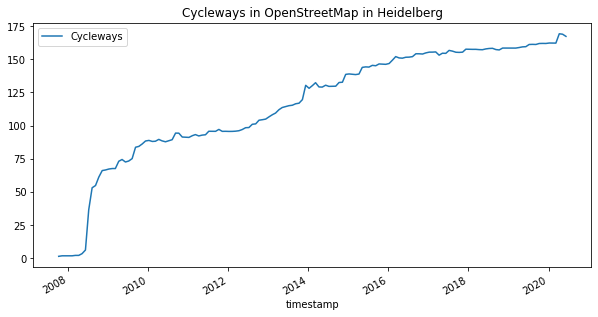

In [7]:
# Send  post request to ohsome api,save response and plot result
def length(filter):
    res = elements("/length"
    ,filter=filter
    ,bpolys=bpolys
    ,time= f'{start_date}/{end_date}/{time_interval}')
    body = res.json()
    display(body)
    df = pd.DataFrame(body['result'])
    df.value = df.value/1000 # length is coming in meters, we want to plot km on axis
    df.timestamp = pd.to_datetime(df.timestamp)
    df.rename(columns={'value':"Cycleways" },inplace=True)
    df.set_index('timestamp', inplace=True)  
    df.plot(title="Cycleways in OpenStreetMap in Heidelberg",figsize=(10,5))# plotting the result

length(filterCycle)

## 5 Get cycleway data from ohsome API

In [8]:
# Send  post request to ohsome api data extraction, save response geojson and show result on a map
def getGeom(filter):
    res = elements("/geometry"
    ,filter=filter
    ,bpolys=bpolys
    ,time= f'{start_date}/{end_date}/{time_interval}')
    body = res.json()
    return body
cycleGeojson = getGeom(filterCycle)  

## 6 Display cycleways on a Web Map

In [9]:
m = Map(center=(49.4101, 8.6831), zoom=14)

geo_json = GeoJSON(data=cycleGeojson)

m.add_layer(geo_json)

m

Map(center=[49.4101, 8.6831], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…